In [2]:
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.fcs_experiments import FCSExperiment
from immunova.data.utilities import get_fcs_file_paths
from immunova.flow.gating.utilities import centroid
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from immunova.data.mongo_setup import test_init
import warnings
warnings.filterwarnings('ignore')
test_init()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd

In [3]:
t = FCSExperiment.objects(experiment_id='ILTIS_T1').get()

In [5]:
samples = t.list_samples()

In [6]:
g = Gating(t, samples[0])

In [7]:
g.populations.keys()

dict_keys(['root', 'cells', 'debris', 'manual_lymphocytes', 'manual_lymphocytes_NEG', 'manual_liveCD3', 'manual_dead', 'manual_gdt', 'manual_nongdt', 'manual_mait', 'manual_classic', 'manual_cd4', 'manual_cd8', 'manual_other', 'manual_naive', 'manual_EMRA', 'manual_CM', 'manual_EM', 'gmm_lymphocytes', 'gmm_lymphocytes_NEG', 'dbscan_lymphocytes', 'hdbscan_lymphocytes', 'dens2d_lymphocytes', 'dens2d_lymphocytes_NEG', 'gmm_liveCD3', 'gmm_liveCD3_NEG', 'dbscan_liveCD3', 'hdbscan_liveCD3', 'gmm_gdt', 'gmm_nongdt', 'gmm_mait', 'gmm_classic', 'dbscan_mait', 'dbscan_classic', 'hdbscan_mait', 'hdbscan_classic', 'gmm_cd8', 'gmm_notcd8', 'dbscan_cd4', 'dbscan_cd8', 'hdbscan_cd4', 'hdbscan_cd8', 'dbscan_gdt', 'dbscan_nongdt', 'dens2d_gdt', 'dens2d_nongdt', 'gmm_cd4', 'gmm_notcd4', 'dens2d_cd4', 'dens2d_cd8', 'dens2d_notcd4cd8', 'dens2d_mait', 'dens2d_classic', 'hdbscan_gdt', 'hdbscan_nongdt', 'dens2d_liveCD3', 'dens2d_dead'])

In [10]:
data = pd.DataFrame()
for s in samples:
    print(f'Collecting {s}...')
    try:
        g = Gating(t, s)
        d = g.get_population_df('manual_cd4', transform=True).sample(n=5000)
        d['sample_id'] = s
        data = pd.concat([d, data])
    except TypeError as e:
        print(f'Failed to collect {s}')

Continuing with blank Gating object. Check that populations have not been removed.
Population manual_cd4 not recognised
Failed to collect sep37
Population manual_cd4 not recognised
Failed to collect sep70
Population manual_cd4 not recognised
Failed to collect sep76
Population manual_cd4 not recognised
Failed to collect sep87
Population manual_cd4 not recognised
Failed to collect sep88
Population manual_cd4 not recognised
Failed to collect sep97
Population manual_cd4 not recognised
Failed to collect sep98
Population manual_cd4 not recognised
Failed to collect sep99


In [11]:
data.shape[0]

1412778

In [13]:
sampled_data = pd.DataFrame()
for s in data.sample_id.unique():
    d = data[data.sample_id == s].sample(n=5000)
    sampled_data = pd.concat([sampled_data, d])

In [16]:
len(sampled_data.sample_id.unique())

13

In [21]:
import colorcet as cc
colours = [cc.rainbow[i*15] for i in range(13)]

In [24]:
sampled_data = sampled_data.drop('Time', axis=1)

In [27]:
sample_data = pd.melt(sampled_data, id_vars=['sample_id'], var_name='channel', value_name='mfi')

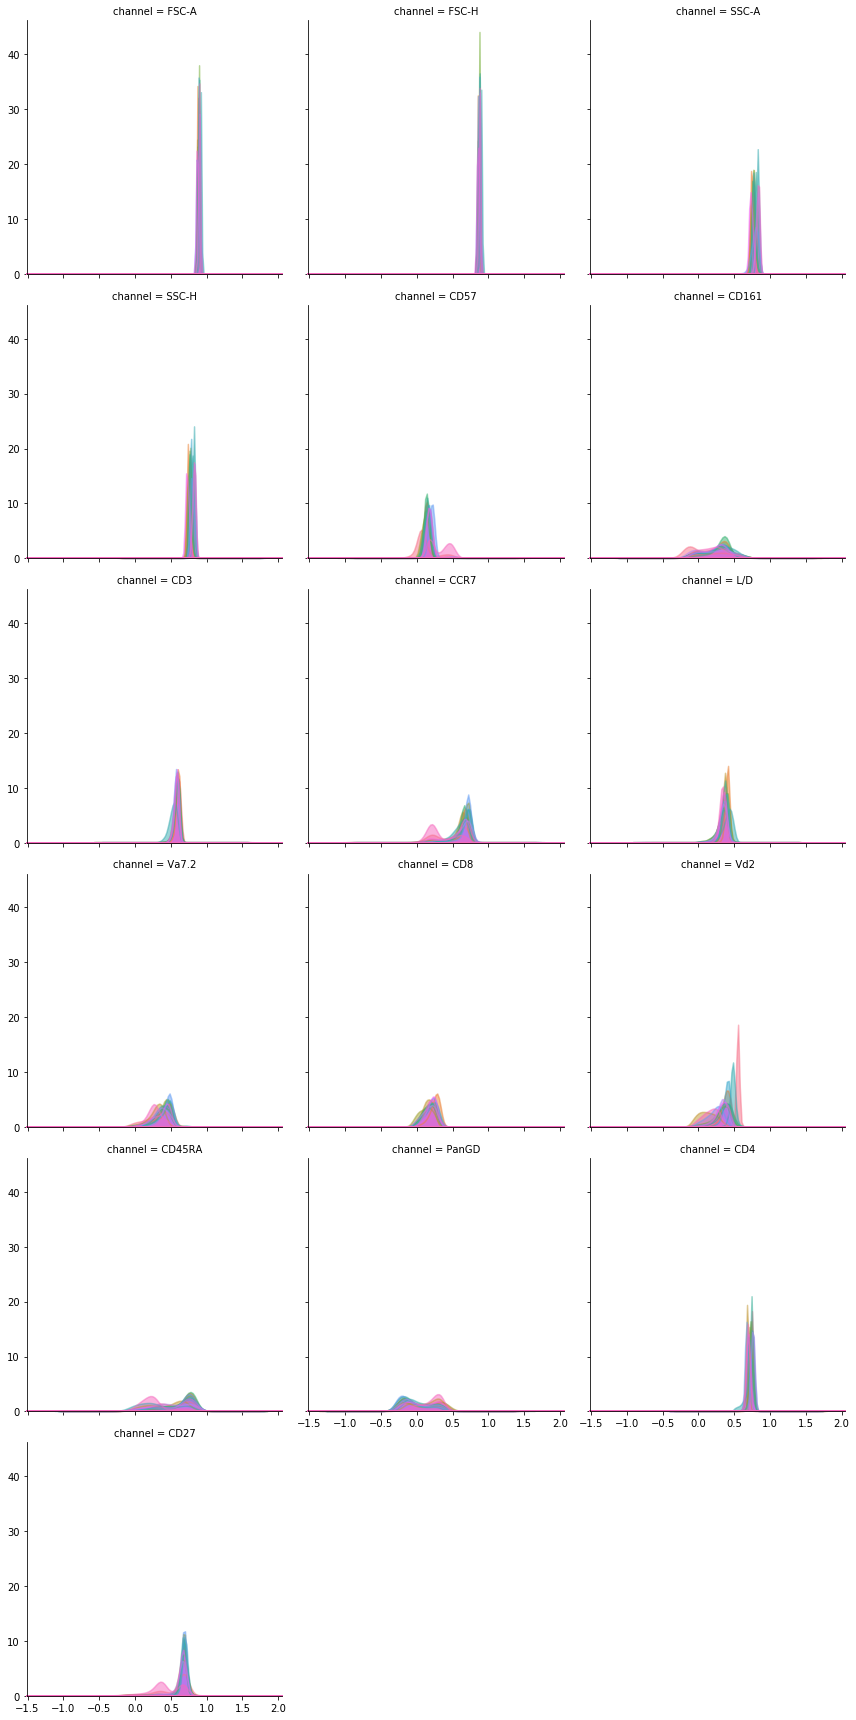

In [38]:
d = sample_data[~sample_data.channel.isin(['FSC-W', 'SSC-W'])]
g = sns.FacetGrid(d, col="channel", hue="sample_id", height=4, col_wrap=3)
g.map(sns.kdeplot, "mfi", clip_on=False, shade=True, alpha=0.5, lw=1.5, bw=.3)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

In [30]:
for c in sample_data.channel.unique():
    d = sample_data[sample_data.channel = c]
    for s in 
    sns.kdeplot(d.mfi, clip_on=False, shade=True, alpha=0.5, lw=1.5, bw=.3, hue=)